In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

ModuleNotFoundError: No module named 'keras.layers.advanced_activations'

instead of from keras.layers.advanced_activations import LeakyReLU

use from keras.layers import ELU, PReLU, LeakyReLU

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import ELU, PReLU, LeakyReLU

#load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])


#Build the network
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print(model.summary())

Train size: 60000
Test size: 10000
dense (None, 784) ==> (None, 512)
dense_1 (None, 512) ==> (None, 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/5


469/469 [==============================] - 4s 7ms/step - loss: 0.2649 - accuracy: 0.9237 - val_loss: 0.1316 - val_accuracy: 0.9603
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1065 - accuracy: 0.9681 - val_loss: 0.0851 - val_accuracy: 0.9757
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0838 - val_accuracy: 0.9749
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.0706 - val_accuracy: 0.9787
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0375 - accuracy: 0.9885 - val_loss: 0.0677 - val_accuracy: 0.9789

Test loss: 0.068
Test accuracy: 0.979


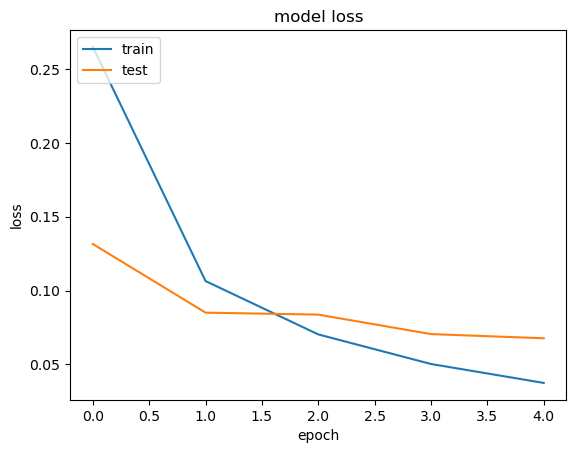

In [7]:
#Train the network
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print()
print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3865 - accuracy: 0.8873 - val_loss: 0.2991 - val_accuracy: 0.9140
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3107 - accuracy: 0.9141 - val_loss: 0.3851 - val_accuracy: 0.8807
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2979 - accuracy: 0.9172 - val_loss: 0.2864 - val_accuracy: 0.9188
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2889 - accuracy: 0.9191 - val_loss: 0.2846 - val_accuracy: 0.9209
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2841 - accuracy: 0.9205 - val_loss: 0.2878 - val_accuracy: 0.9165
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2808 - accuracy: 0.9211 - val_loss: 0.2793 - val_accuracy: 0.9232
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2769 - accuracy: 0.9232 - val_loss: 0.3163 - val_accuracy: 0.9104
Epoch 

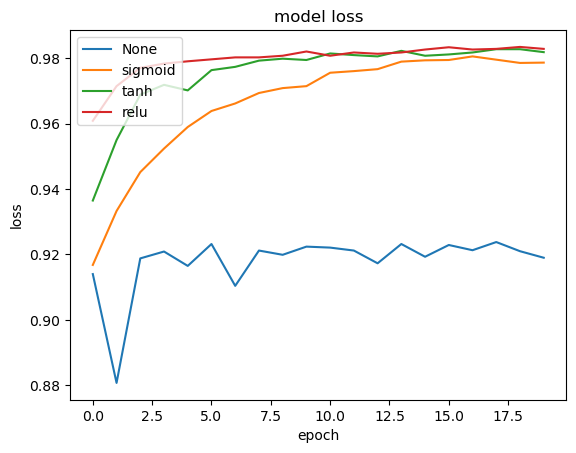

In [9]:
#Build networks using all activations
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_accuracy'])
    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')